In [1]:
import pandas as pd
import requests 
import sys
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')
data.head(2)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\mwj05\AppData\Local\Temp\ipykernel_11560\3427963180.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')


,행정구역,인구수,남자인구수,여자인구수,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,92823,46958,45865,8298,10731,11389,13631,17139,14590,...,91,42,5,14,222,856,63,78,15,0
1,우정읍,17439,9598,7841,639,1353,1718,1557,2493,3635,...,28,14,1,7,17,348,27,7,5,0


In [3]:
data_all = data[['행정구역','인구수','체육시설 수', '병원 수','정류장 수','도서관 수', '노래방 수',
        '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수','의원 수','PC방 수','카페 수','학교 수','학원 수','편의점 수','어린이집 수','유치원 수','일반음식점 수','종합병원 수']]
data_all.head(2)


,행정구역,인구수,체육시설 수,병원 수,정류장 수,도서관 수,노래방 수,"박물관,미술관 수",시장 및 마트 수,약국 수,...,의원 수,PC방 수,카페 수,학교 수,학원 수,편의점 수,어린이집 수,유치원 수,일반음식점 수,종합병원 수
0,봉담읍,92823,66,2,220,1,44,1,44,30,...,91,42,5,14,222,63,78,15,856,0
1,우정읍,17439,16,2,189,2,12,0,12,9,...,28,14,1,7,17,27,7,5,348,0


In [4]:
#청년
young = data[['행정구역','10-19세','20-29세','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
              '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
              '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']]
young['청년 수'] = young['10-19세'] + young['20-29세']
young.drop(columns=['10-19세','20-29세'], inplace=True)
#청년, 중년


young_middle = data[['행정구역','10-19세','20-29세','30-39세','40-49세','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
                     '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
                     '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']]
young_middle['청년+중년 수'] = young_middle['10-19세'] + young_middle['20-29세'] + young_middle['30-39세'] + young_middle['40-49세']
young_middle.drop(columns=['10-19세','20-29세','30-39세','40-49세'], inplace=True)

# 유아, 중년
kid_middle = data[['행정구역','0-9세','30-39세','40-49세','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
                    '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
                    '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']]
kid_middle['유아+중년 수'] = kid_middle['0-9세'] + kid_middle['30-39세'] + kid_middle['40-49세']
kid_middle.drop(columns=['0-9세','30-39세','40-49세'], inplace=True)
# 청년 데이터프레임 재배열
young = young[['행정구역', '청년 수'] + [col for col in young.columns if col not in ['행정구역', '청년 수']]]

# 청년+중년 데이터프레임 재배열
young_middle = young_middle[['행정구역', '청년+중년 수'] + [col for col in young_middle.columns if col not in ['행정구역', '청년+중년 수']]]

# 유아+중년 데이터프레임 재배열
kid_middle = kid_middle[['행정구역', '유아+중년 수'] + [col for col in kid_middle.columns if col not in ['행정구역', '유아+중년 수']]]
young.to_csv('young.csv', encoding='cp949', index=False)
young_middle.to_csv('young_middle.csv', encoding='cp949', index=False)
kid_middle.to_csv('kid_middle.csv', encoding='cp949', index=False)

C:\Users\mwj05\AppData\Local\Temp\ipykernel_11560\4244627760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young['청년 수'] = young['10-19세'] + young['20-29세']
C:\Users\mwj05\AppData\Local\Temp\ipykernel_11560\4244627760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young.drop(columns=['10-19세','20-29세'], inplace=True)
C:\Users\mwj05\AppData\Local\Temp\ipykernel_11560\4244627760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [5]:
print(young.head(2))
print(young_middle.head(2))
print(kid_middle.head(2))

  행정구역   청년 수  병원 수  노래방 수  체육시설 수  도서관 수  박물관,미술관 수  시장 및 마트 수  약국 수  정류장 수  \
0  봉담읍  22120     2     44      66      1          1         44    30    220   
1  우정읍   3071     2     12      16      2          0         12     9    189   

   ...  의원 수  PC방 수  카페 수  학교 수  학원 수  일반음식점 수  편의점 수  어린이집 수  유치원 수  종합병원 수  
0  ...    91     42     5    14   222      856     63      78     15       0  
1  ...    28     14     1     7    17      348     27       7      5       0  

[2 rows x 21 columns]
  행정구역  청년+중년 수  병원 수  노래방 수  체육시설 수  도서관 수  박물관,미술관 수  시장 및 마트 수  약국 수  \
0  봉담읍    52890     2     44      66      1          1         44    30   
1  우정읍     7121     2     12      16      2          0         12     9   

   정류장 수  ...  의원 수  PC방 수  카페 수  학교 수  학원 수  일반음식점 수  편의점 수  어린이집 수  유치원 수  \
0    220  ...    91     42     5    14   222      856     63      78     15   
1    189  ...    28     14     1     7    17      348     27       7      5   

   종합병원 수  
0       0  
1       0  

## 전체 연령

In [6]:
# 모든 열에 대해 정규화 수행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 행정구역 열 제외하고 모든 열 정규화
data_normalized = data_all.copy()
columns_to_normalize = data_all.columns.drop('행정구역')
data_normalized[columns_to_normalize] = scaler.fit_transform(data_all[columns_to_normalize])
data_all = data_normalized

In [7]:
data_all.head(2)

,행정구역,인구수,체육시설 수,병원 수,정류장 수,도서관 수,노래방 수,"박물관,미술관 수",시장 및 마트 수,약국 수,...,의원 수,PC방 수,카페 수,학교 수,학원 수,편의점 수,어린이집 수,유치원 수,일반음식점 수,종합병원 수
0,봉담읍,1.000000,0.985075,0.333333,0.859375,0.333333,0.830189,0.2,0.830189,0.769231,...,0.957895,0.456522,0.357143,0.736842,0.676829,0.750000,1.000000,0.9375,0.682616,0.0
1,우정읍,0.187874,0.238806,0.333333,0.738281,0.666667,0.226415,0.0,0.226415,0.230769,...,0.294737,0.152174,0.071429,0.368421,0.051829,0.321429,0.089744,0.3125,0.277512,0.0


<Axes: >

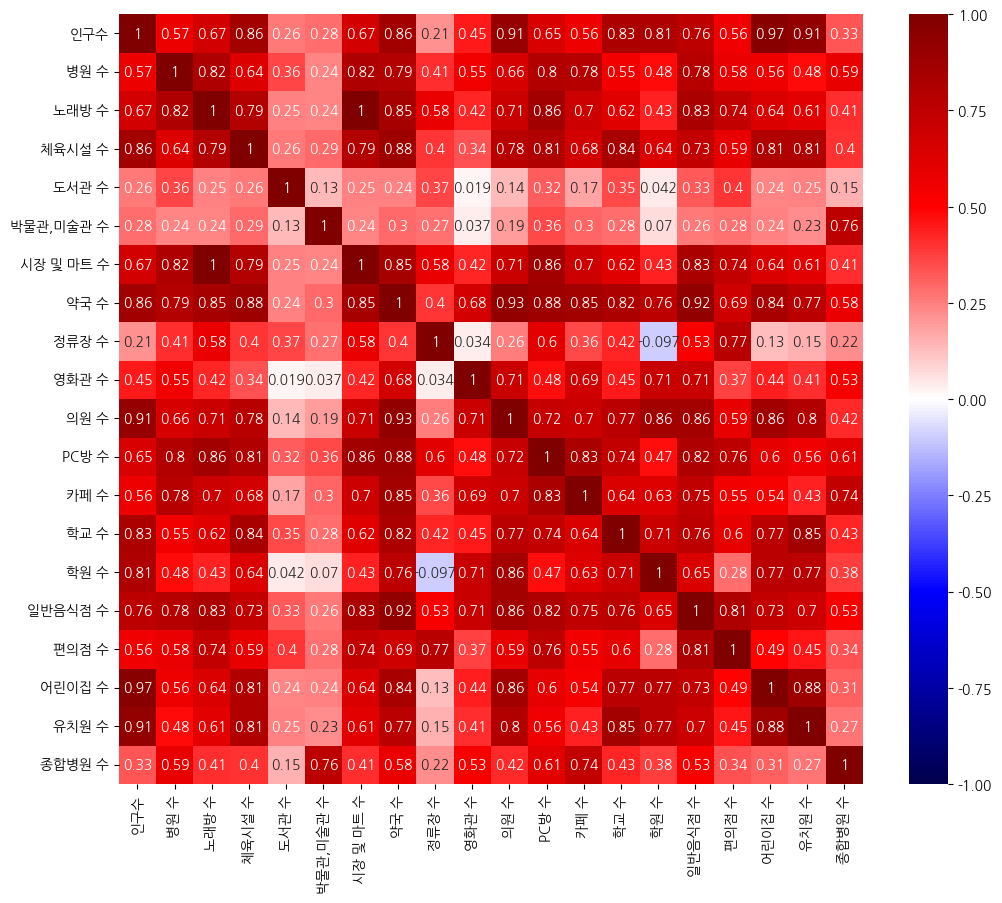

In [8]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

corrMat = data_all[['인구수','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
                    '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
                    '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)

In [9]:
# 인구 데이터를 y로, 나머지 데이터 중 상관관계가 거의 없는 것과 행정동 제외, 다중공선성은 일단 고려 X
drop_columns = ['인구수','행정구역']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_all.drop(drop_columns, axis = 1), data_all['인구수'], test_size=0.2, random_state=0)

In [11]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')
X_train = X_train.astype('float')
X_test = X_test.astype('float')
#데이터를 float 형으로 변환

In [12]:
def RMSE(y_true, y_pred):
  output = np.sqrt(np.mean((y_true - y_pred)**2))
  return output

In [13]:
from sklearn.ensemble import RandomForestRegressor
#랜덤 포레스트를 위한 라이브러리

RF_model = RandomForestRegressor(random_state = 40, n_estimators = 20, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train) #학습

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=40)

In [14]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [15]:
RMSE(np.array(y_train), RF_pred_train)

np.float64(0.0402730709808611)

In [16]:
RMSE(np.array(y_test), RF_pred_test)

np.float64(0.09173975633356854)

In [17]:
RF_model.feature_importances_

array([7.95108007e-02, 1.14298610e-02, 3.49206789e-02, 8.11685793e-03,
       3.23140630e-03, 1.81358911e-02, 1.64491113e-02, 1.19263248e-01,
       9.61033157e-04, 2.13506084e-01, 1.11496994e-03, 6.60303637e-04,
       2.53567079e-04, 1.58704737e-01, 1.22510258e-02, 3.09244609e-01,
       8.90882907e-03, 7.06885550e-04, 2.63010008e-03])

In [18]:
X_train.columns

Index(['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수',
       '약국 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수',
       '어린이집 수', '유치원 수', '일반음식점 수', '종합병원 수'],
      dtype='object')

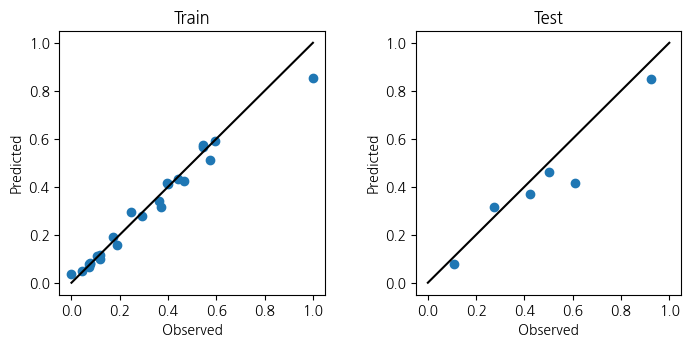

In [19]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV #그리드 서치 라이브러리
from sklearn import metrics #평가지표 판단에 쓰는 라이브러리

RF_model = RandomForestRegressor()

RMSE_scorer = metrics.make_scorer(RMSE, greater_is_better = False)
#평가함수. RMSE로 평가할거임. 값이 큰 것이 좋은게 아니므로(오차를 나타내므로 작은게 좋다) False

RF_params = {'random_state' : [40], 'n_estimators': list(range(5, 51, 5)), 'max_depth': list(range(2, 6, 1))}
#랜덤성 고정시키고 샘플링을 5~50 5단위로(즉, 5, 10, 15, ..), 최대 깊이를 2~5 1단위로 (즉, 2, 3, 4, 5)

In [21]:
GS_RF_model = GridSearchCV(estimator = RF_model,
                           param_grid = RF_params,
                           scoring = RMSE_scorer,
                           cv = 5)
     

In [22]:
GS_RF_model.fit(X_train, y_train)

d:\system\conda\contest\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50],
                         'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [23]:
GS_RF_model.best_params_

{'max_depth': 5, 'n_estimators': 10, 'random_state': 40}

In [24]:
GS_RF_pred_test = GS_RF_model.best_estimator_.predict(X_test)
GS_RF_pred_train = GS_RF_model.best_estimator_.predict(X_train)

In [25]:
RMSE(y_train, GS_RF_pred_train)

np.float64(0.03345283978304202)

In [26]:
RMSE(y_test, GS_RF_pred_test)

np.float64(0.08047903233025952)

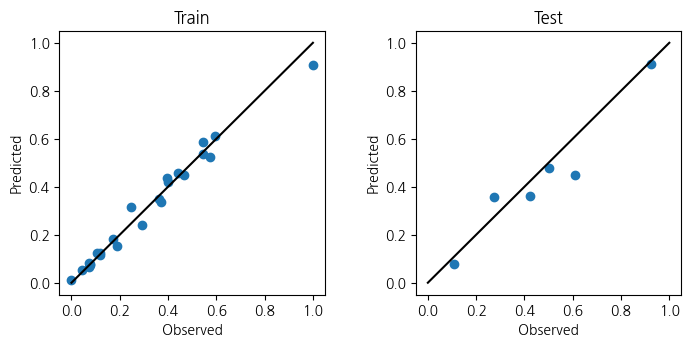

In [27]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, GS_RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, GS_RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [28]:
RF_model = RandomForestRegressor(random_state = 40, n_estimators = 10, max_depth=5) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=40)

In [29]:
RF_model.feature_importances_

array([5.24826832e-02, 1.88488431e-03, 3.57995801e-02, 1.76018355e-03,
       2.16260741e-03, 2.01979690e-02, 3.10311061e-02, 5.05004407e-04,
       1.38573951e-03, 2.11592294e-01, 8.93425135e-04, 0.00000000e+00,
       1.21239846e-04, 3.06546132e-01, 1.90337136e-02, 2.94747181e-01,
       9.75119262e-03, 4.91277931e-03, 5.19228550e-03])

In [30]:
X_train.columns

Index(['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수',
       '약국 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수',
       '어린이집 수', '유치원 수', '일반음식점 수', '종합병원 수'],
      dtype='object')

In [31]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

scaler = MinMaxScaler()
# 행정구역 열 제외하고 모든 열 정규화
pred_normalized = pred_data.copy()
columns_to_normalize = pred_data.columns.drop('행정구역','인구수')
pred_normalized[columns_to_normalize] = scaler.fit_transform(pred_data[columns_to_normalize])
pred_normalized['인구수'] = scaler.fit_transform(pred_data['인구수'].values.reshape(-1,1))
pred_data = pred_normalized

# pred_data = pred_data[pred_data['행정구역']=='매송면'] # 매송면

pred_data.drop(['0-9세','10-19세','20-29세','30-39세','40-49세','50-59세','60-69세','70-79세','80-89세','90-99세','100세 이상','남자인구수',
                '여자인구수'], axis=1, inplace=True)

pred_x = pred_data[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                    '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                    'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                    '유치원 수', '일반음식점 수', '종합병원 수']]
pred_y = pred_data['인구수']

res = GS_RF_model.predict(pred_x)
res_unscaled = scaler.inverse_transform([res])
print(res_unscaled)

[[84354.5        14304.2        84644.9        56911.8
   6248.88333333  7386.85        7640.83333333 11660.61666667
   7006.48333333 11496.6         7399.4         4881.95
  10578.56666667 33343.18333333 54514.45       40420.8
  29371.65       38808.8        16956.73333333 22167.1
  49753.55       31190.03333333 42351.         48555.45
  44300.15       41581.7        41638.2        32345.03333333
  33506.81666667  1110.        ]]


In [32]:
original_population = pd.DataFrame(res_unscaled[0], columns=['인구수'])
original_population['행정구역'] = pred_data['행정구역']
original_population = original_population[['행정구역', '인구수']]
original_population

,행정구역,인구수
0,봉담읍,84354.500000
1,우정읍,14304.200000
2,향남읍,84644.900000
3,남양읍,56911.800000
4,매송면,6248.883333
5,비봉면,7386.850000
6,마도면,7640.833333
7,송산면,11660.616667
8,서신면,7006.483333
9,팔탄면,11496.600000


In [33]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')
pred_data.head(2)

,행정구역,인구수,남자인구수,여자인구수,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,92823,46958,45865,8298,10731,11389,13631,17139,14590,...,91,42,5,14,222,856,63,78,15,0
1,우정읍,17439,9598,7841,639,1353,1718,1557,2493,3635,...,28,14,1,7,17,348,27,7,5,0


In [39]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')
# 15~33
increase_amount = 1

# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    for facility_idx in range(15,34):
        modified_data = pred_data.copy()
        modified_data.iloc[i, facility_idx] += increase_amount # 병원
        
        scaler = MinMaxScaler()
        
        # 행정구역 열 제외하고 모든 열 정규화
        modi_normalized = modified_data.copy()
        columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
        modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
        modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

        mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                    '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                    'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                    '유치원 수', '일반음식점 수', '종합병원 수']]
        mod_pred_y = modified_data['인구수']
        res = GS_RF_model.predict(mod_pred_x)
        res_unscaled = scaler.inverse_transform([res])
        
        # 원래 인구 수와 비교하여 증가량 계산
        original_population_value = original_population['인구수'].iloc[i]
        predicted_population = res_unscaled[0][i]
        
        # 인구 수 증가량과 비율 계산
        population_increase = predicted_population - original_population_value
        population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

        # 결과를 리스트에 추가
        add_population.append({
            '행정구역': modified_data['행정구역'].iloc[i],
            '원래 인구수': original_population_value,
            '예측 인구수': predicted_population,
            '인구수 증가량': population_increase,
            '증가 비율 (%)': population_increase_rate
        })

        result_df = pd.DataFrame(add_population)
        
        east_regions = ['동탄1동', '동탄2동', '동탄3동', '동탄4동', '동탄5동', '동탄6동', 
                    '동탄7동', '동탄8동', '동탄9동', '병점1동', '병점2동', '반월동', 
                    '진안동', '화산동', '기배동']

        # 동부/서부 평균 계산
        east_df = result_df[result_df['행정구역'].isin(east_regions)]
        west_df = result_df[~result_df['행정구역'].isin(east_regions)]

        east = max(0, east_df['증가 비율 (%)'].mean())
        west = max(0, west_df['증가 비율 (%)'].mean())
        print(f'{modified_data.columns[facility_idx]} 증가 비율')
        print(f"동부 평균 인구 증가율: {east:.2f} %")
        print(f"서부 평균 인구 증가율: {west:.2f} %")
    # east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
    # west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
    # print(f"동부 평균 인구 증가율: {east:.2f} %")
    # print(f"서부 평균 인구 증가율: {west:.2f} %") 

병원 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
노래방 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
체육시설 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
도서관 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.09 %
박물관,미술관 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.07 %
시장 및 마트 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.06 %
약국 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.05 %
정류장 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.04 %
영화관 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.04 %
의원 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.03 %
PC방 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.03 %
카페 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.03 %
학교 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.03 %
학원 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.02 %
일반음식점 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.02 %
편의점 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.02 %
어린이집 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.02 %
유치원 수 증가 비율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.02 %
종합병원 수 증가 비율
동부 평균 인구 

In [45]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')
increase_amount = 1

# 동부/서부 지역 구분
east_regions = ['동탄1동', '동탄2동', '동탄3동', '동탄4동', '동탄5동', '동탄6동', 
            '동탄7동', '동탄8동', '동탄9동', '병점1동', '병점2동', '반월동', 
            '진안동', '화산동', '기배동']

# 시설별 결과를 저장할 딕셔너리
facility_results = {}

# 각 시설별로 분석
for facility_idx in range(15, 34):
    facility_name = pred_data.columns[facility_idx]
    facility_results[facility_name] = {'east': [], 'west': []}
    
    # 각 지역별로 분석
    for i in range(0, 29):
        modified_data = pred_data.copy()
        modified_data.iloc[i, facility_idx] += increase_amount
        
        # 정규화
        scaler = MinMaxScaler()
        modi_normalized = modified_data.copy()
        columns_to_normalize = modified_data.columns.drop(['행정구역', '인구수'])
        modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
        modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

        # 예측
        pred_columns = ['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                       '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                       'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                       '유치원 수', '일반음식점 수', '종합병원 수']
        mod_pred_x = modi_normalized[pred_columns]
        res = GS_RF_model.predict(mod_pred_x)
        res_unscaled = scaler.inverse_transform([res])
        
        # 증가율 계산
        original_pop = original_population['인구수'].iloc[i]
        predicted_pop = res_unscaled[0][i]
        increase_rate = ((predicted_pop - original_pop) / original_pop * 100) if original_pop > 0 else 0
        
        # 동부/서부 구분하여 저장
        if modified_data['행정구역'].iloc[i] in east_regions:
            facility_results[facility_name]['east'].append(increase_rate)
        else:
            facility_results[facility_name]['west'].append(increase_rate)

# 결과 정리 및 출력
print("\n=== 시설별 인구 증가율 분석 결과 ===\n")
print(f"{'시설명':^15} {'동부 증가율':^12} {'서부 증가율':^12} {'평균 증가율':^12}")
print("-" * 55)

results_list = []
for facility, rates in facility_results.items():
    east_avg = max(0, np.mean(rates['east']))
    west_avg = max(0, np.mean(rates['west']))
    
    results_list.append({
        '시설명': facility,
        '동부 증가율': east_avg,
        '서부 증가율': west_avg
    })

# 평균 증가율 기준으로 정렬
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values('평균 증가율', ascending=False)

# 결과 출력
for _, row in results_df.iterrows():
    print(f"{row['시설명']:^15} {row['동부 증가율']:>10.2f}% {row['서부 증가율']:>10.2f}% {row['평균 증가율']:>10.2f}%")


=== 시설별 인구 증가율 분석 결과 ===

      시설명          동부 증가율       서부 증가율       평균 증가율   
-------------------------------------------------------
    종합병원 수            0.43%      16.99%       8.71%
   박물관,미술관 수          8.13%       0.47%       4.30%
     유치원 수            0.33%       3.26%       1.79%
     의원 수             1.50%       0.01%       0.75%
     영화관 수            0.42%       0.62%       0.52%
    어린이집 수            1.03%       0.00%       0.52%
     약국 수             0.00%       0.79%       0.40%
     PC방 수            0.00%       0.52%       0.26%
    체육시설 수            0.00%       0.49%       0.24%
     도서관 수            0.39%       0.02%       0.20%
     병원 수             0.36%       0.00%       0.18%
   시장 및 마트 수          0.05%       0.00%       0.02%
     노래방 수            0.00%       0.00%       0.00%
     정류장 수            0.00%       0.00%       0.00%
     카페 수             0.00%       0.00%       0.00%
    일반음식점 수           0.00%       0.00%       0.00%
     학원 수             0.00%   

In [43]:
import pandas as pd

# 데이터 생성
data = {
    '시설명': ['종합병원 수', '박물관,미술관 수', '유치원 수', '의원 수', '영화관 수', '어린이집 수', 
              '약국 수', 'PC방 수', '체육시설 수', '도서관 수', '병원 수', '시장 및 마트 수', 
              '노래방 수', '정류장 수', '카페 수', '일반음식점 수', '학원 수', '학교 수', '편의점 수'],
    '동부 증가율': [0.43, 8.13, 0.33, 1.50, 0.42, 1.03, 0.00, 0.00, 0.00, 0.39, 0.36, 0.05, 
                0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    '서부 증가율': [16.99, 0.47, 3.26, 0.01, 0.02, 0.00, 0.79, 0.52, 0.49, 0.02, 0.00, 0.00,
                0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]
}

# DataFrame 생성
df = pd.DataFrame(data)
df

,시설명,동부 증가율,서부 증가율
0,종합병원 수,0.43,16.99
1,"박물관,미술관 수",8.13,0.47
2,유치원 수,0.33,3.26
3,의원 수,1.50,0.01
4,영화관 수,0.42,0.02
5,어린이집 수,1.03,0.00
6,약국 수,0.00,0.79
7,PC방 수,0.00,0.52
8,체육시설 수,0.00,0.49
9,도서관 수,0.39,0.02


In [44]:
# CSV 파일로 저장
df.to_csv('전연령 전시설 인구 증가율.csv', index=False, encoding='cp949')